In [81]:
install.packages("qgraph")

also installing the dependencies ‘tmvnsim’, ‘mnormt’, ‘pbivnorm’, ‘psych’, ‘lavaan’, ‘glasso’, ‘fdrtool’, ‘gtools’, ‘pbapply’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(miic)
library(bnlearn)
library(pcalg)
library(igraph)
library(qgraph)


Attaching package: ‘pcalg’


The following objects are masked from ‘package:bnlearn’:

    dsep, pdag2dag, shd, skeleton



Attaching package: ‘igraph’


The following objects are masked from ‘package:bnlearn’:

    as.igraph, compare, degree, subgraph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
options(repr.plot.width=18, repr.plot.height=15)

# Exploratory Analysis

In [466]:
data(cosmicCancer)

In [318]:
head(cosmicCancer)

,bbc3,egln1,tgfb3,esm1,igfbp5,fgf18,scube2,wisp1,flt1,hrasls,⋯,PPP2R2A,CCNE1,PTEN,MDM2,USP7,UBE3A,PLK1,BAX,MET,Ploidy
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
2,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
3,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
4,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
5,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
6,n,n,n,n,n,n,n,n,n,n,⋯,under,normal,normal,normal,over,normal,normal,normal,normal,2


In [18]:
str(cosmicCancer, list.len=ncol(cosmicCancer))

'data.frame':	807 obs. of  176 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ esm1    : Factor w/ 1 level "n": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 

The dataset contains 807 observations of 176 variables

* All variable are categorical with 1-2-3 levels
* Some variables have a single level and the same value for all observations and can be removed

In [61]:
levles_variables = sapply(cosmicCancer, nlevels)
levles_variables[levles_variables<2]
length(levles_variables[levles_variables<2])

esm1    ebf4 qscn6l1   cenpa   kntc2   orc6l   aytl2    peci  cdkn2a  cdkn1a 
      1       1       1       1       1       1       1       1       1       1 
  foxo1 ppp2r2a spdye7p 
      1       1       1

[1] 13

13 variables that have 1 level only

These variables add no information and can be removed from the dataset

In [43]:
na_count <-sapply(cosmicCancer, function(y) sum(length(which(is.na(y)))))
na_count[na_count!=0]

Ploidy 
     8

Only Ploidly has NA (which is explained in the introduction)

# HC

## Building graph with HC

In [454]:
# 2) Call the hill-climbing approach from the bnlearn package 
# and identify the issues related to the observational data if 
# any. Propose a way to resolve them.
cosmicCancer_hc = bnlearn::hc(cosmicCancer)

ERROR: Error in check.data(x): the data set contains NaN/NA values.


We need to remove the 8 rows with NA in Ploidy to be able to construct the graph

In [455]:
data_no_na = cosmicCancer[complete.cases(cosmicCancer),]

In [456]:
dim(data_no_na)

[1] 799 176

Confirm that we removed the 8 rows with NA values AKA we removed the observations that don't have information about Ploidy

In [457]:
cosmicCancer_hc = bnlearn::hc(data_no_na)

ERROR: Error in check.data(x): variable esm1 must have at least two levels.


All variables need to have at least 2 levels which confirms our hypothesis that we need to remove 1 level variables

In [458]:
data_cleaned = data_no_na[, sapply(data_no_na, nlevels) > 1]

In [459]:
str(data_cleaned)

'data.frame':	799 obs. of  163 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ gnaz    : Factor w/ 2 levels "n","y": 1 1 1 1

In [460]:
dim(data_cleaned)

[1] 799 163

Confirmed the dimension of the cleaned data and that we removed all variables with level =1

In [64]:
cosmicCancer_hc = bnlearn::hc(data_cleaned)
cosmicCancer_hc

Warning message in check.data(x):
“variable gstm3 has levels that are not observed in the data.”



  Bayesian network learned via Score-based methods

  model:
   [bbc3][melk][ext1][mmp9][rtn4rl1][diaph3][aldh4a1][gstm3][slc2a3][bcl2][tp73]
   [mapk14][birc3][ets1][ets2][ccne1][ube3a][BBC3][NUSAP1][RECQL5][MMP9]
   [PRC1|NUSAP1][DTL|NUSAP1][dtl|PRC1][brca1|PRC1][GNAZ|PRC1][FOXM1|NUSAP1:PRC1]
   [RFC4|NUSAP1:FOXM1][CENPA|RFC4:FOXM1][GMPS|RFC4:FOXM1][HRASLS|CENPA:RFC4]
   [ECT2|NUSAP1:GMPS][BCL2|CENPA][CHEK1|GMPS:FOXM1][AURKB|CENPA:FOXM1]
   [AURKA|ECT2:CENPA:PRC1][PPP2R1A|AURKB][PTEN|AURKB][PLK1|FOXM1:AURKB]
   [tp53|CENPA:GMPS:AURKA][myc|AURKA][UBE3A|AURKA][BAX|PPP2R1A][SCUBE2|tp53]
   [EXT1|tp53:PRC1][TSPYL5|tp53:FOXM1][ESR1|tp53][TP53|tp53:AURKB]
   [APOBEC3B|tp53:PRC1][CCNE1|tp53:CENPA:FOXM1][MDM2|tp53][Ploidy|tp53:AURKA]
   [lin9|MDM2][STK32B|ESR1][MTDH|TSPYL5:GMPS][PITRM1|tp53:CCNE1]
   [RUNDC1|tp53:CCNE1][CDCA7|TSPYL5:FOXM1:CCNE1][RTN4RL1|TSPYL5][GSTM3|MDM2]
   [CDKN2A|GMPS:CCNE1][BIRC3|APOBEC3B][PPP2R2A|Ploidy][flt1|BIRC3][dusp5|STK32B]
   [TGFB3|MTDH][MELK|CENPA:CDCA7:GMPS]

## Visualize the graphe from HC

In [67]:
cosmicCancer_hc_adj = amat(cosmicCancer_hc)
head(cosmicCancer_hc_adj)

,bbc3,egln1,tgfb3,igfbp5,fgf18,scube2,wisp1,flt1,hrasls,stk32b,⋯,PPP2R2A,CCNE1,PTEN,MDM2,USP7,UBE3A,PLK1,BAX,MET,Ploidy
bbc3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
egln1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
tgfb3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
igfbp5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
fgf18,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
scube2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


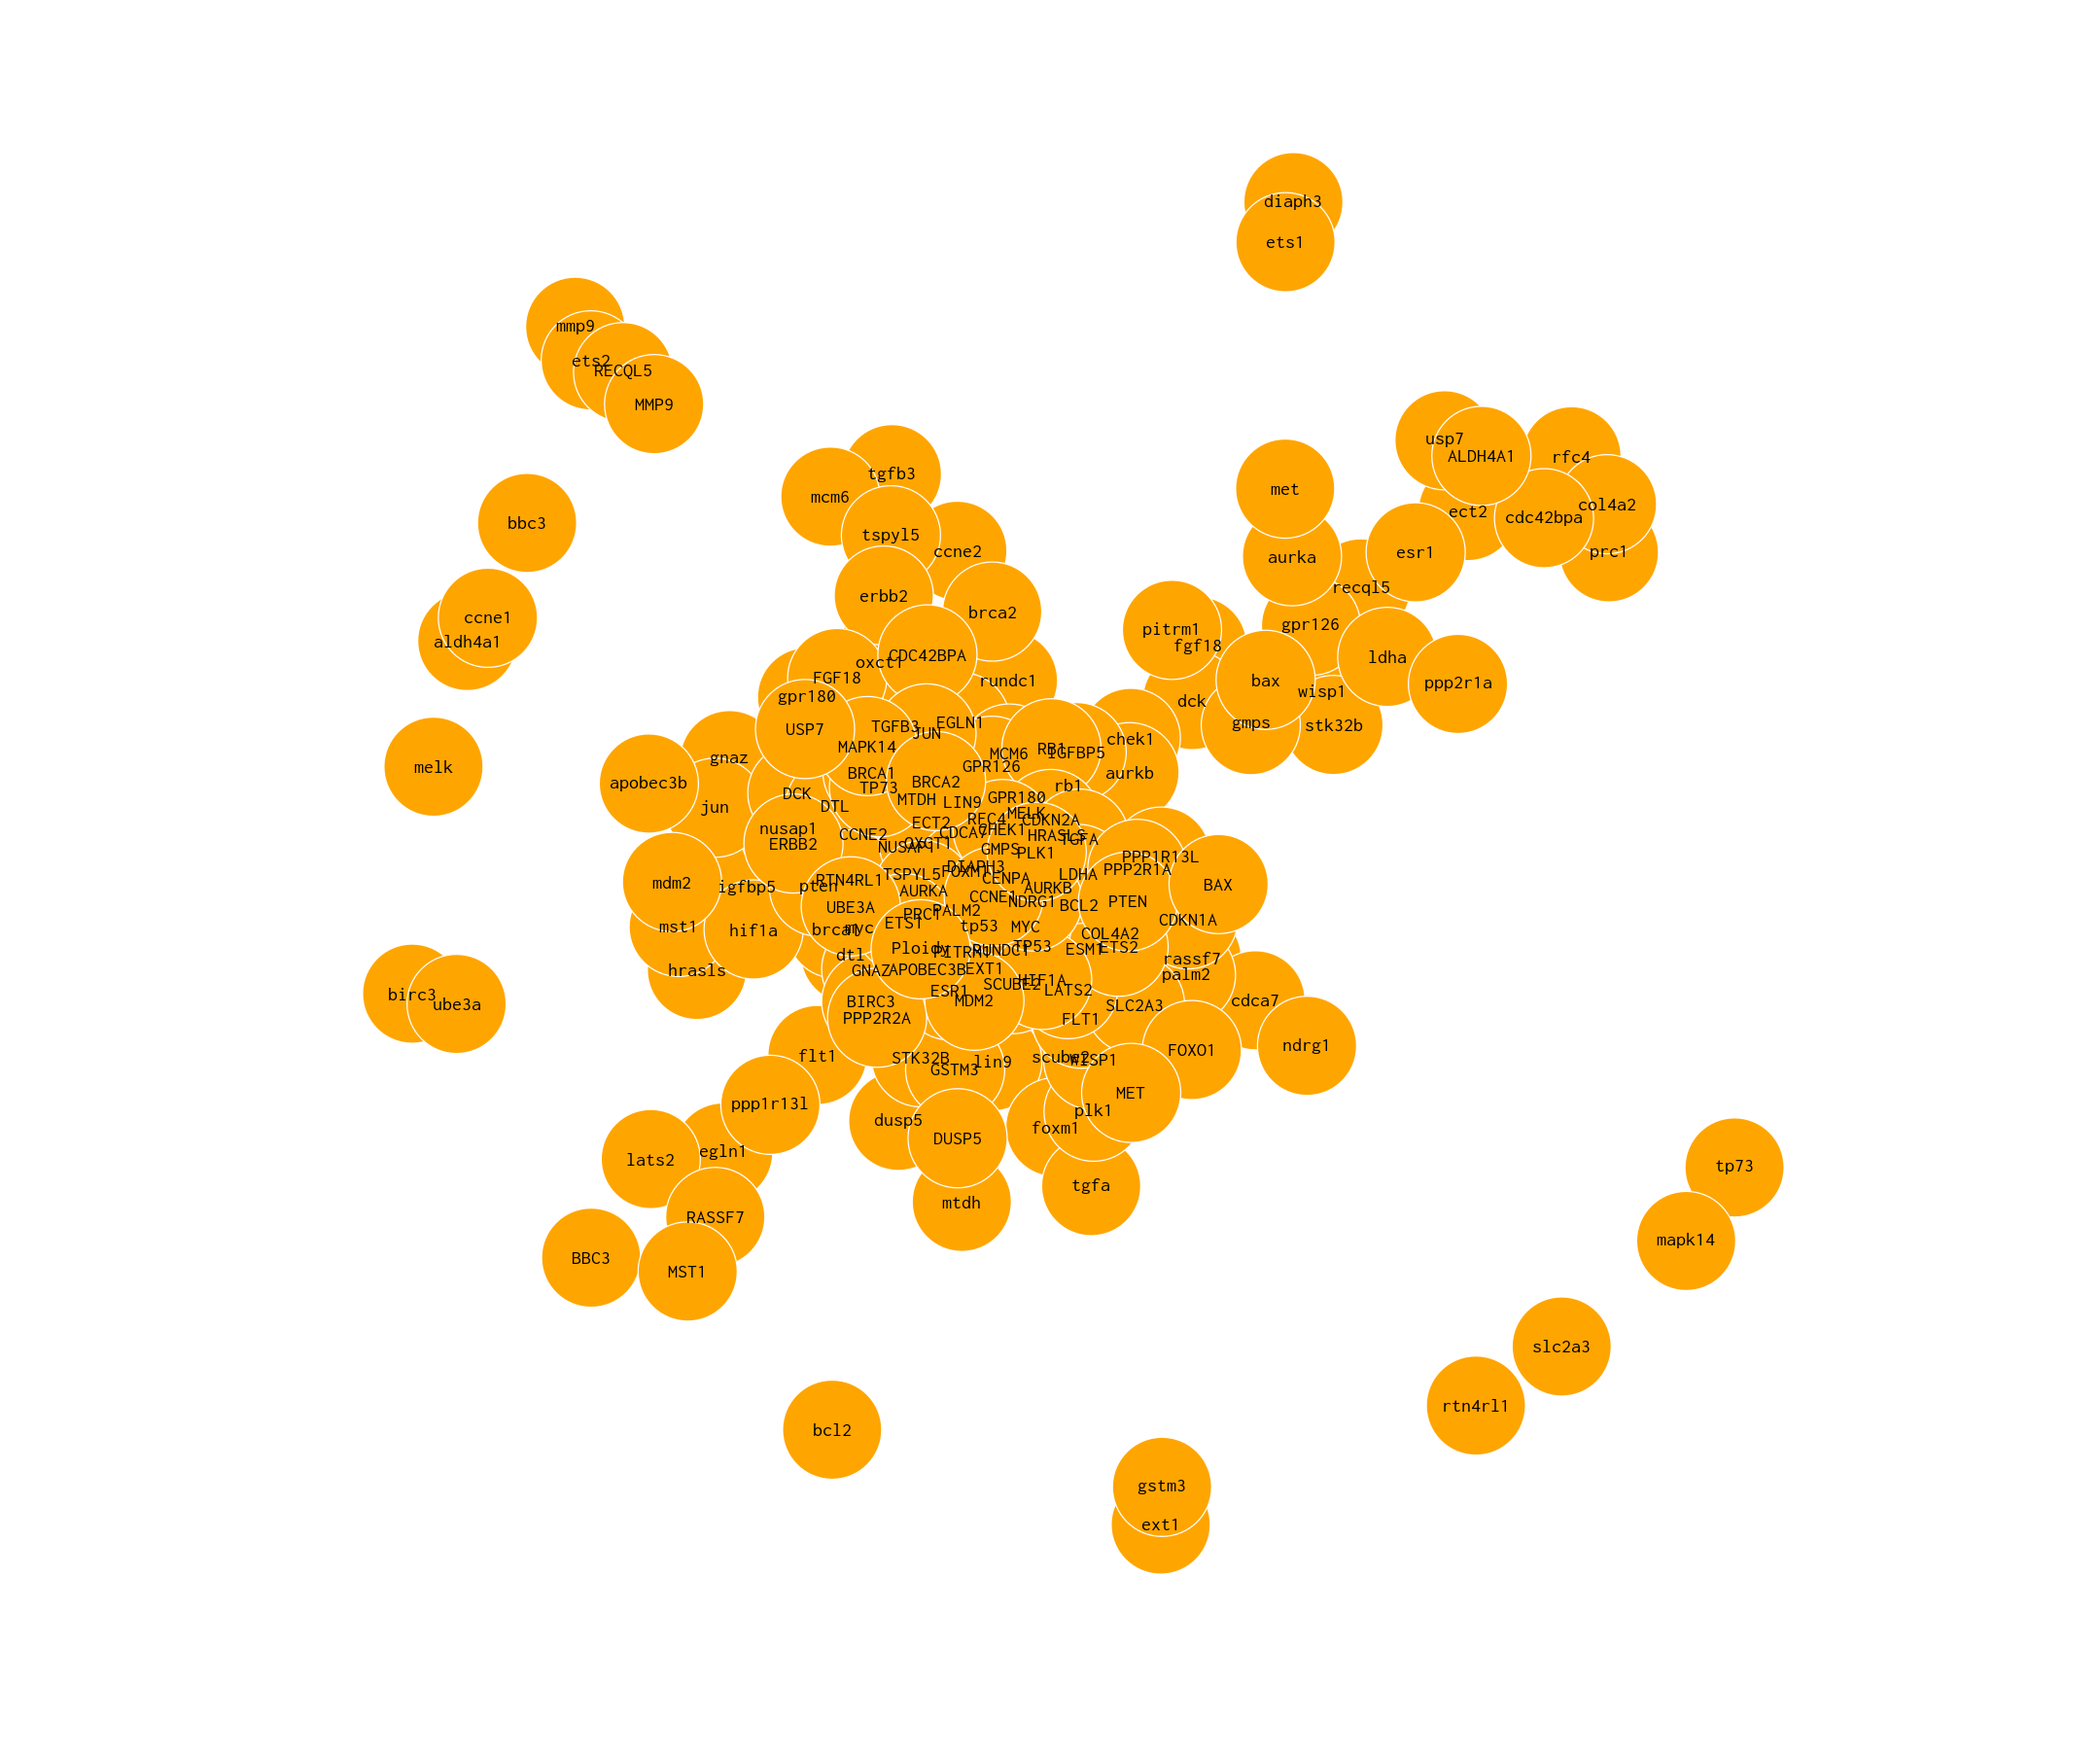

In [73]:
cosmicCancer_hc_net = igraph::graph_from_adjacency_matrix(cosmicCancer_hc_adj)
plot(cosmicCancer_hc_net,
     edge.color = "orange", vertex.color = "orange",
     vertex.frame.color ="#ffffff",
     vertex.label.color = "black",
     layout =layout_components)

In [285]:
degree_hc = degree(cosmicCancer_hc_net, mode="all")

In [286]:
zero_vertices = as.data.frame(degree_hc[degree_hc==0])

In [287]:
zero_vertices = rownames(zero_vertices)
zero_vertices

[1] "bbc3"    "melk"    "ext1"    "mmp9"    "rtn4rl1" "diaph3"  "aldh4a1"
 [8] "gstm3"   "slc2a3"  "bcl2"    "tp73"    "mapk14"  "birc3"   "ets1"   
[15] "ets2"    "ccne1"   "ube3a"   "BBC3"    "RECQL5"  "MMP9"

In [288]:
cleaned_graph_hc = delete_vertices(graph = cosmicCancer_hc_net, v = zero_vertices)

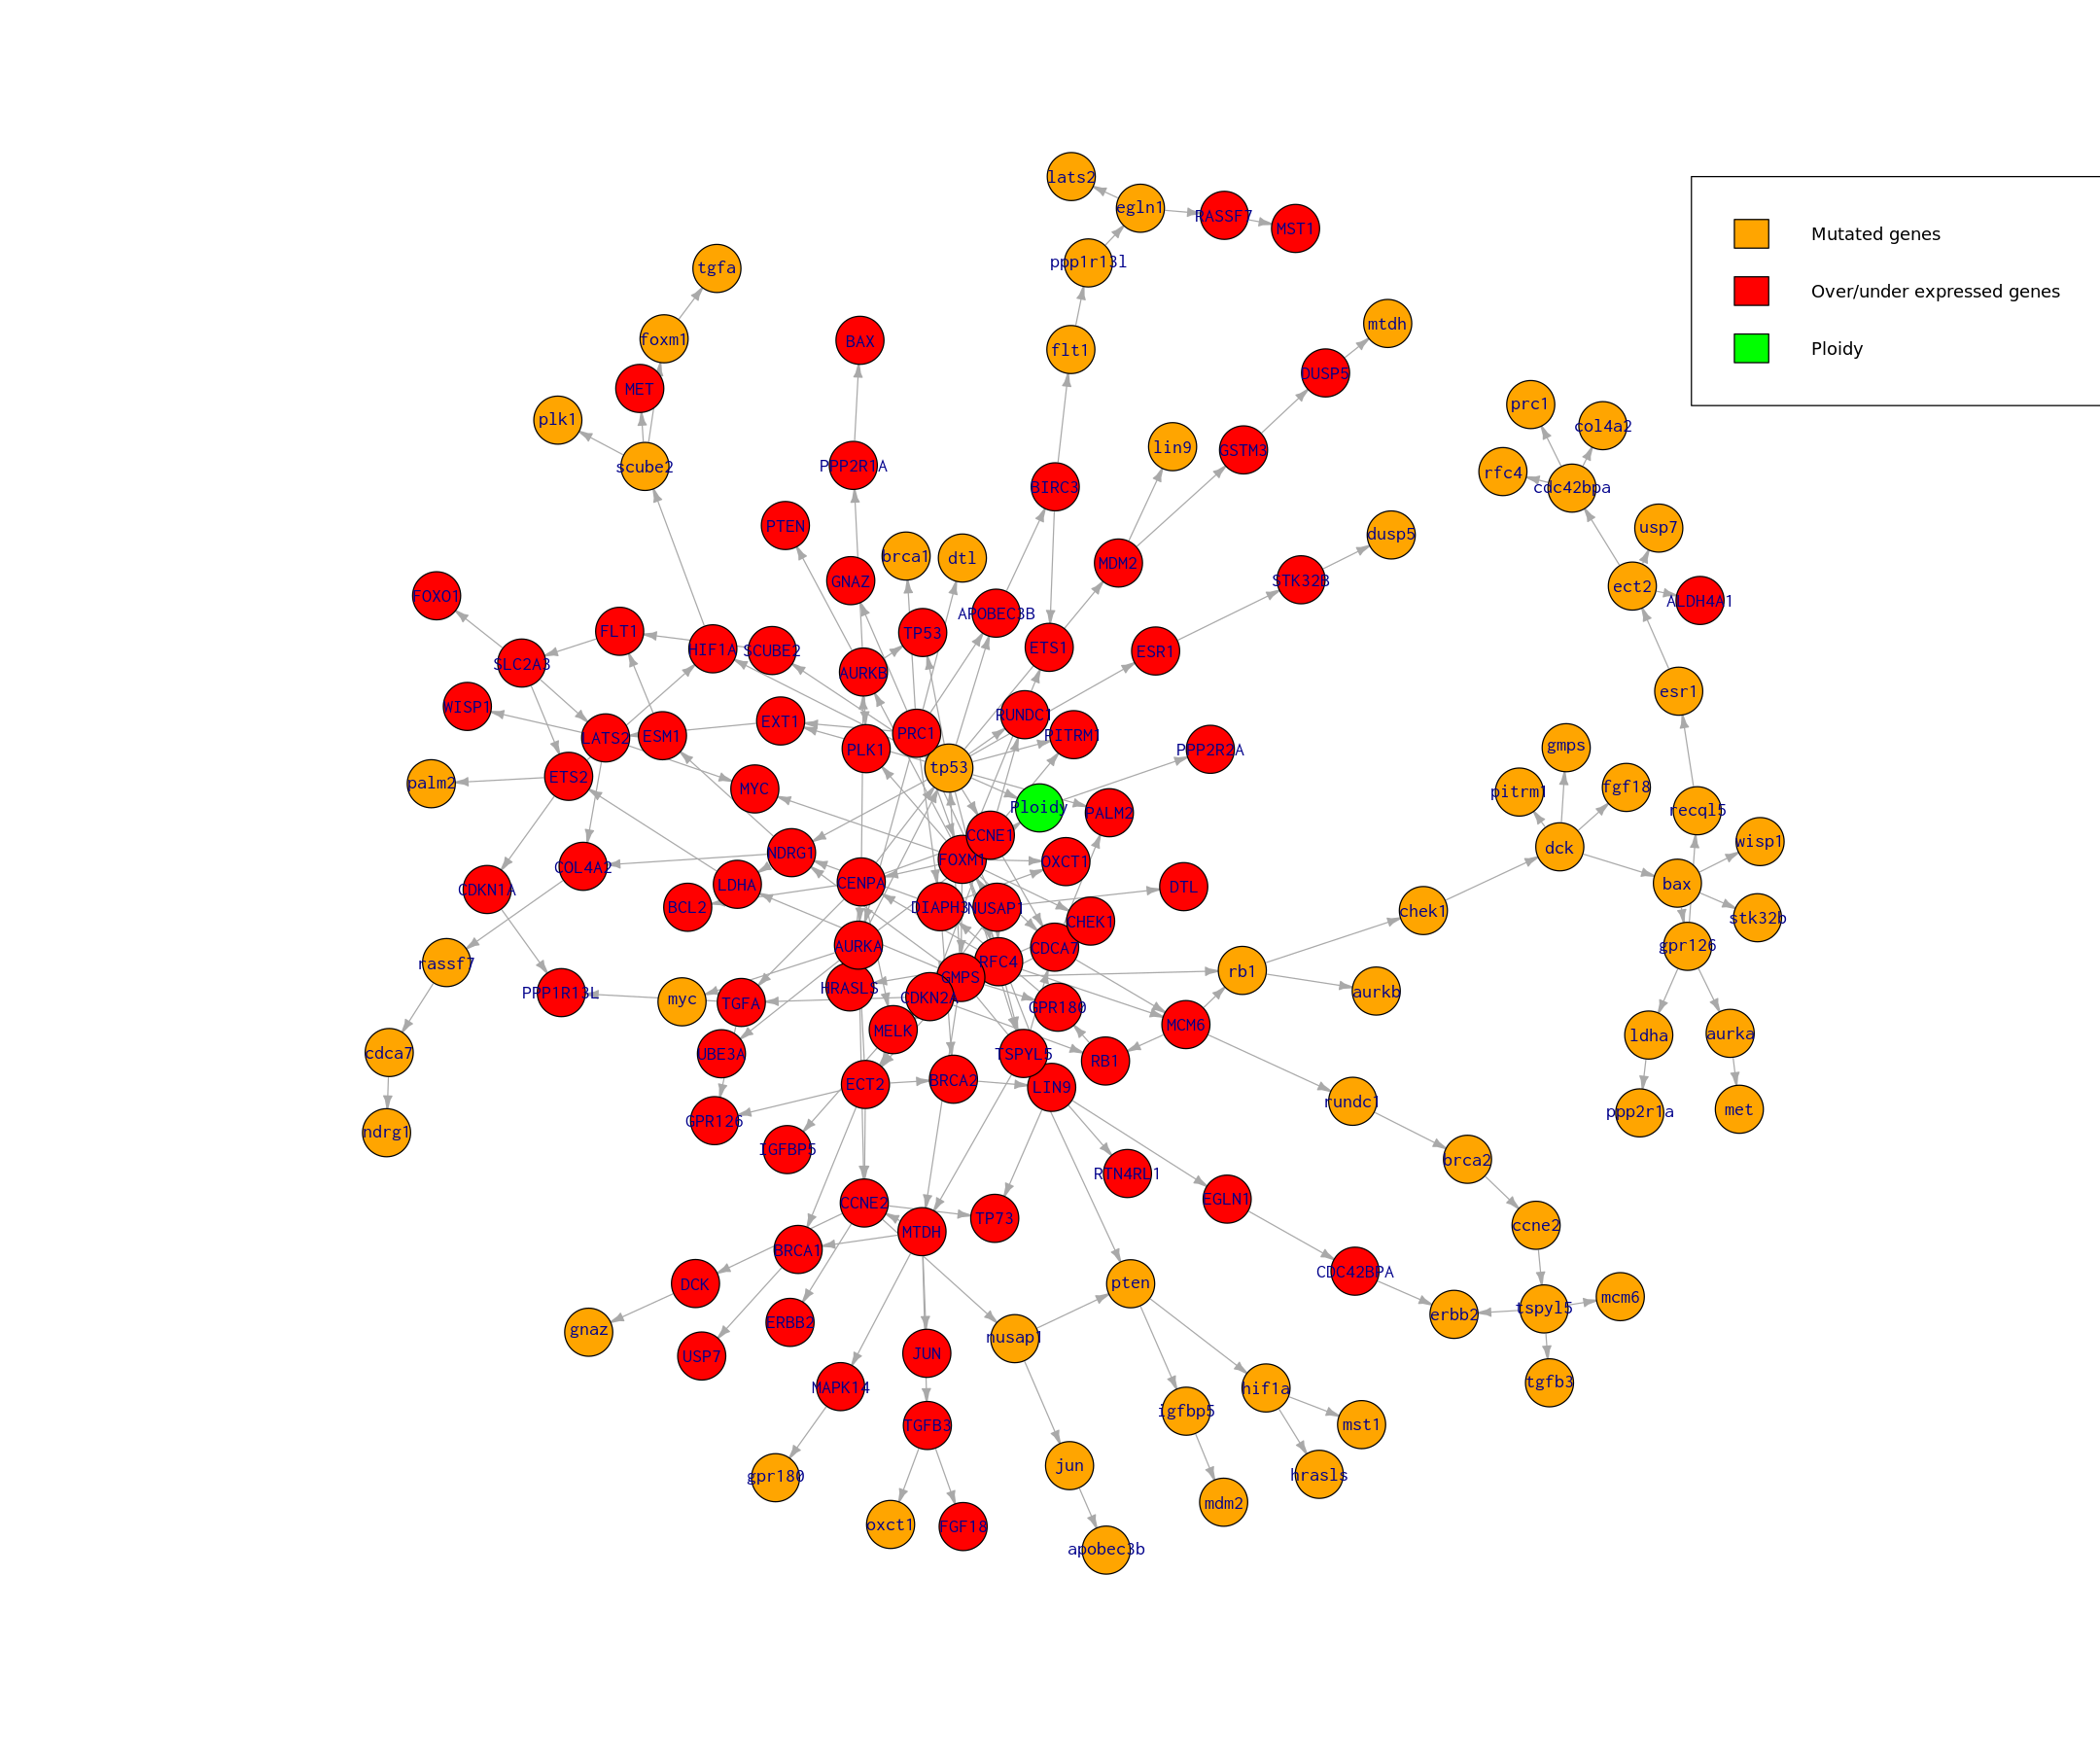

In [289]:
e <- get.edgelist(cleaned_graph_hc,names=FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(cleaned_graph_hc))
plot(cleaned_graph_hc,layout=l,vertex.size=7, edge.arrow.size = .2, vertex.color = ifelse(V(cleaned_graph_hc)$name == toupper(V(cleaned_graph_hc)$name) , "red",ifelse(V(cleaned_graph_hc)$name == "Ploidy", "green", "orange")))
legend(0.9,1,
       legend=c("Mutated genes", "Over/under expressed genes", "Ploidy"),
       fill = c("orange", "red", "green"),       # Color of the squares
       border = "black", # Color of the border of the squares
       cex = 0.9)
# mtext("Removed 0 level vertices", side=1)

## Identifying relevant nodes and edges

In [290]:
all_vars = colnames(cosmicCancer_hc_adj)

In [291]:
mutated_genes = all_vars[all_vars == tolower(all_vars)]
mutated_genes

[1] "bbc3"     "egln1"    "tgfb3"    "igfbp5"   "fgf18"    "scube2"  
 [7] "wisp1"    "flt1"     "hrasls"   "stk32b"   "rassf7"   "dck"     
[13] "melk"     "ext1"     "gnaz"     "mtdh"     "pitrm1"   "ccne2"   
[19] "ect2"     "lin9"     "mcm6"     "nusap1"   "tspyl5"   "rundc1"  
[25] "prc1"     "rfc4"     "recql5"   "cdca7"    "dtl"      "col4a2"  
[31] "gpr180"   "mmp9"     "gpr126"   "rtn4rl1"  "diaph3"   "cdc42bpa"
[37] "palm2"    "aldh4a1"  "oxct1"    "gmps"     "gstm3"    "slc2a3"  
[43] "foxm1"    "erbb2"    "esr1"     "tp53"     "rb1"      "myc"     
[49] "jun"      "bcl2"     "tp73"     "lats2"    "mapk14"   "chek1"   
[55] "aurkb"    "aurka"    "brca1"    "brca2"    "dusp5"    "mst1"    
[61] "ppp1r13l" "birc3"    "tgfa"     "ets1"     "ets2"     "hif1a"   
[67] "ldha"     "ndrg1"    "ppp2r1a"  "ccne1"    "apobec3b" "pten"    
[73] "mdm2"     "usp7"     "ube3a"    "plk1"     "bax"      "met"

In [292]:
over_under_genes =  all_vars[all_vars == toupper(all_vars)]
over_under_genes

[1] "BBC3"     "EGLN1"    "TGFB3"    "ESM1"     "IGFBP5"   "FGF18"   
 [7] "SCUBE2"   "WISP1"    "FLT1"     "HRASLS"   "STK32B"   "RASSF7"  
[13] "DCK"      "MELK"     "EXT1"     "GNAZ"     "MTDH"     "PITRM1"  
[19] "CCNE2"    "ECT2"     "CENPA"    "LIN9"     "MCM6"     "NUSAP1"  
[25] "TSPYL5"   "RUNDC1"   "PRC1"     "RFC4"     "RECQL5"   "CDCA7"   
[31] "DTL"      "COL4A2"   "GPR180"   "MMP9"     "GPR126"   "RTN4RL1" 
[37] "DIAPH3"   "CDC42BPA" "PALM2"    "ALDH4A1"  "OXCT1"    "GMPS"    
[43] "GSTM3"    "SLC2A3"   "ERBB2"    "ESR1"     "TP53"     "RB1"     
[49] "MYC"      "JUN"      "CDKN2A"   "BCL2"     "FOXM1"    "BRCA1"   
[55] "TP73"     "LATS2"    "MAPK14"   "CDKN1A"   "CHEK1"    "BRCA2"   
[61] "AURKB"    "AURKA"    "APOBEC3B" "DUSP5"    "MST1"     "PPP1R13L"
[67] "BIRC3"    "TGFA"     "ETS1"     "ETS2"     "HIF1A"    "LDHA"    
[73] "FOXO1"    "NDRG1"    "PPP2R1A"  "PPP2R2A"  "CCNE1"    "PTEN"    
[79] "MDM2"     "USP7"     "UBE3A"    "PLK1"     "BAX"      "MET"

### Relation between mutated genes and other ones

In [294]:
mutated_related_others = rowSums(cosmicCancer_hc_adj[mutated_genes,over_under_genes])
mutated_related_others

bbc3    egln1    tgfb3   igfbp5    fgf18   scube2    wisp1     flt1 
       0        1        0        0        0        1        0        0 
  hrasls   stk32b   rassf7      dck     melk     ext1     gnaz     mtdh 
       0        0        0        0        0        0        0        0 
  pitrm1    ccne2     ect2     lin9     mcm6   nusap1   tspyl5   rundc1 
       0        0        1        0        0        0        0        0 
    prc1     rfc4   recql5    cdca7      dtl   col4a2   gpr180     mmp9 
       0        0        0        0        0        0        0        0 
  gpr126  rtn4rl1   diaph3 cdc42bpa    palm2  aldh4a1    oxct1     gmps 
       0        0        0        0        0        0        0        0 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       0        0        0        0        0       13        0        0 
     jun     bcl2     tp73    lats2   mapk14    chek1    aurkb    aurka 
       0        0        0        0        0        0        0        0 
   brca1    brca2    dusp5     mst1 ppp1r13l    birc3     tgfa     ets1 
       0        0        0        0        0        0        0        0 
    ets2    hif1a     ldha    ndrg1  ppp2r1a    ccne1 apobec3b     pten 
       0        0        0        0        0        0        0        0 
    mdm2     usp7    ube3a     plk1      bax      met 
       0        0        0        0        0        0

In [295]:
mutated_related_others[mutated_related_others != 0]

egln1 scube2   ect2   tp53 
     1      1      1     13

We can confirm on the graph that the significantly related mutated genes are: tp53, ect2, scube2, egln1

### Variables Related to Ploidy

In [307]:
ploidy_related = cosmicCancer_hc_adj[, "Ploidy"]

In [308]:
ploidy_related[ploidy_related != 0]

tp53 AURKA 
    1     1

There are two variables related to Ploidy called tp53 and AURKA

### Top 10 nodes and edges

#### Top Nodes

In [296]:
topNodes = as.data.frame(betweenness(
  cleaned_graph_hc,
  v = V(cleaned_graph_hc),
  directed = TRUE,
  weights = NULL
))
colnames(topNodes) <- c('BW')
topNodes$name <- rownames(topNodes)

In [297]:
topNodes[order(topNodes$BW, decreasing = T),][0:10,]

,BW,name
,<dbl>,<chr>
tp53,424.1667,tp53
MCM6,332.0000,MCM6
dck,300.0000,dck
rb1,299.0000,rb1
chek1,294.0000,chek1
bax,256.0000,bax
CDCA7,252.7333,CDCA7
NDRG1,240.0000,NDRG1
DIAPH3,232.0000,DIAPH3


#### Top Edges

In [298]:
topEdges = as.data.frame(edge_betweenness(
  cleaned_graph_hc,
  e = E(cleaned_graph_hc),
  directed = TRUE,
  weights = NULL
))
colnames(topEdges) <- c('BW')
topEdges$name <- rownames(topEdges)

In [299]:
top10Edges = topEdges[order(topEdges$BW, decreasing = T),][0:10,]
top10Edges

,BW,name
,<dbl>,<chr>
50,315.0,50
47,308.0,47
122,300.5,122
12,272.0,12
61,238.0,61
125,235.0,125
173,230.5,173
98,212.0,98
146,209.0,146


In [300]:
top10Edges$name

[1] "50"  "47"  "122" "12"  "61"  "125" "173" "98"  "146" "128"

In [301]:
for (name in top10Edges$name){
    print(E(cleaned_graph_hc)[strtoi(name)])
}

+ 1/199 edge from 6266d35 (vertex names):
[1] chek1->dck
+ 1/199 edge from 6266d35 (vertex names):
[1] rb1->chek1
+ 1/199 edge from 6266d35 (vertex names):
[1] CDCA7->MCM6
+ 1/199 edge from 6266d35 (vertex names):
[1] dck->bax
+ 1/199 edge from 6266d35 (vertex names):
[1] bax->gpr126
+ 1/199 edge from 6266d35 (vertex names):
[1] GPR180->DIAPH3
+ 1/199 edge from 6266d35 (vertex names):
[1] AURKA->tp53
+ 1/199 edge from 6266d35 (vertex names):
[1] MCM6->rb1
+ 1/199 edge from 6266d35 (vertex names):
[1] RB1->GPR180
+ 1/199 edge from 6266d35 (vertex names):
[1] DIAPH3->NDRG1


# PC

## Building graph with PC

In [3]:
data(cosmicCancer)

In [4]:
na_rows = cosmicCancer[!complete.cases(cosmicCancer),]
na_idx = as.integer(rownames(na_rows))
cosmicCancer_noNA = cosmicCancer[-na_idx,]
dim(cosmicCancer_noNA)
cosmicCancer_noNA[, "Ploidy"] = as.factor(cosmicCancer_noNA[, "Ploidy"])

const_col = c()
for(iCol in c(1:ncol(cosmicCancer_noNA))){
  
  if(length(unique(as.character(cosmicCancer_noNA[, iCol]))) < 2){
    const_col = c(const_col, iCol) 
  }
}

cosmicCancer_noNACst = cosmicCancer_noNA[, -const_col]

[1] 799 176

In [5]:
cosmicCancer_pc=data.matrix(cosmicCancer_noNACst)
cosmicCancer_pc=cosmicCancer_pc-1
nlevels=apply(cosmicCancer_pc,2,function(x) length(attr(as.factor(x), "levels")))
suffStat=list(dm = cosmicCancer_pc, nlev=nlevels, adaptDF = FALSE)
pc_model <- pc(suffStat, indepTest=disCItest, alpha=0.06, labels=colnames(cosmicCancer_pc))
pc_model

Object of class 'pcAlgo', from Call:
pc(suffStat = suffStat, indepTest = disCItest, alpha = 0.06, 
    labels = colnames(cosmicCancer_pc))
Number of undirected edges:  24 
Number of directed edges:    53 
Total number of edges:       77 

## Visualize the graphe from HC

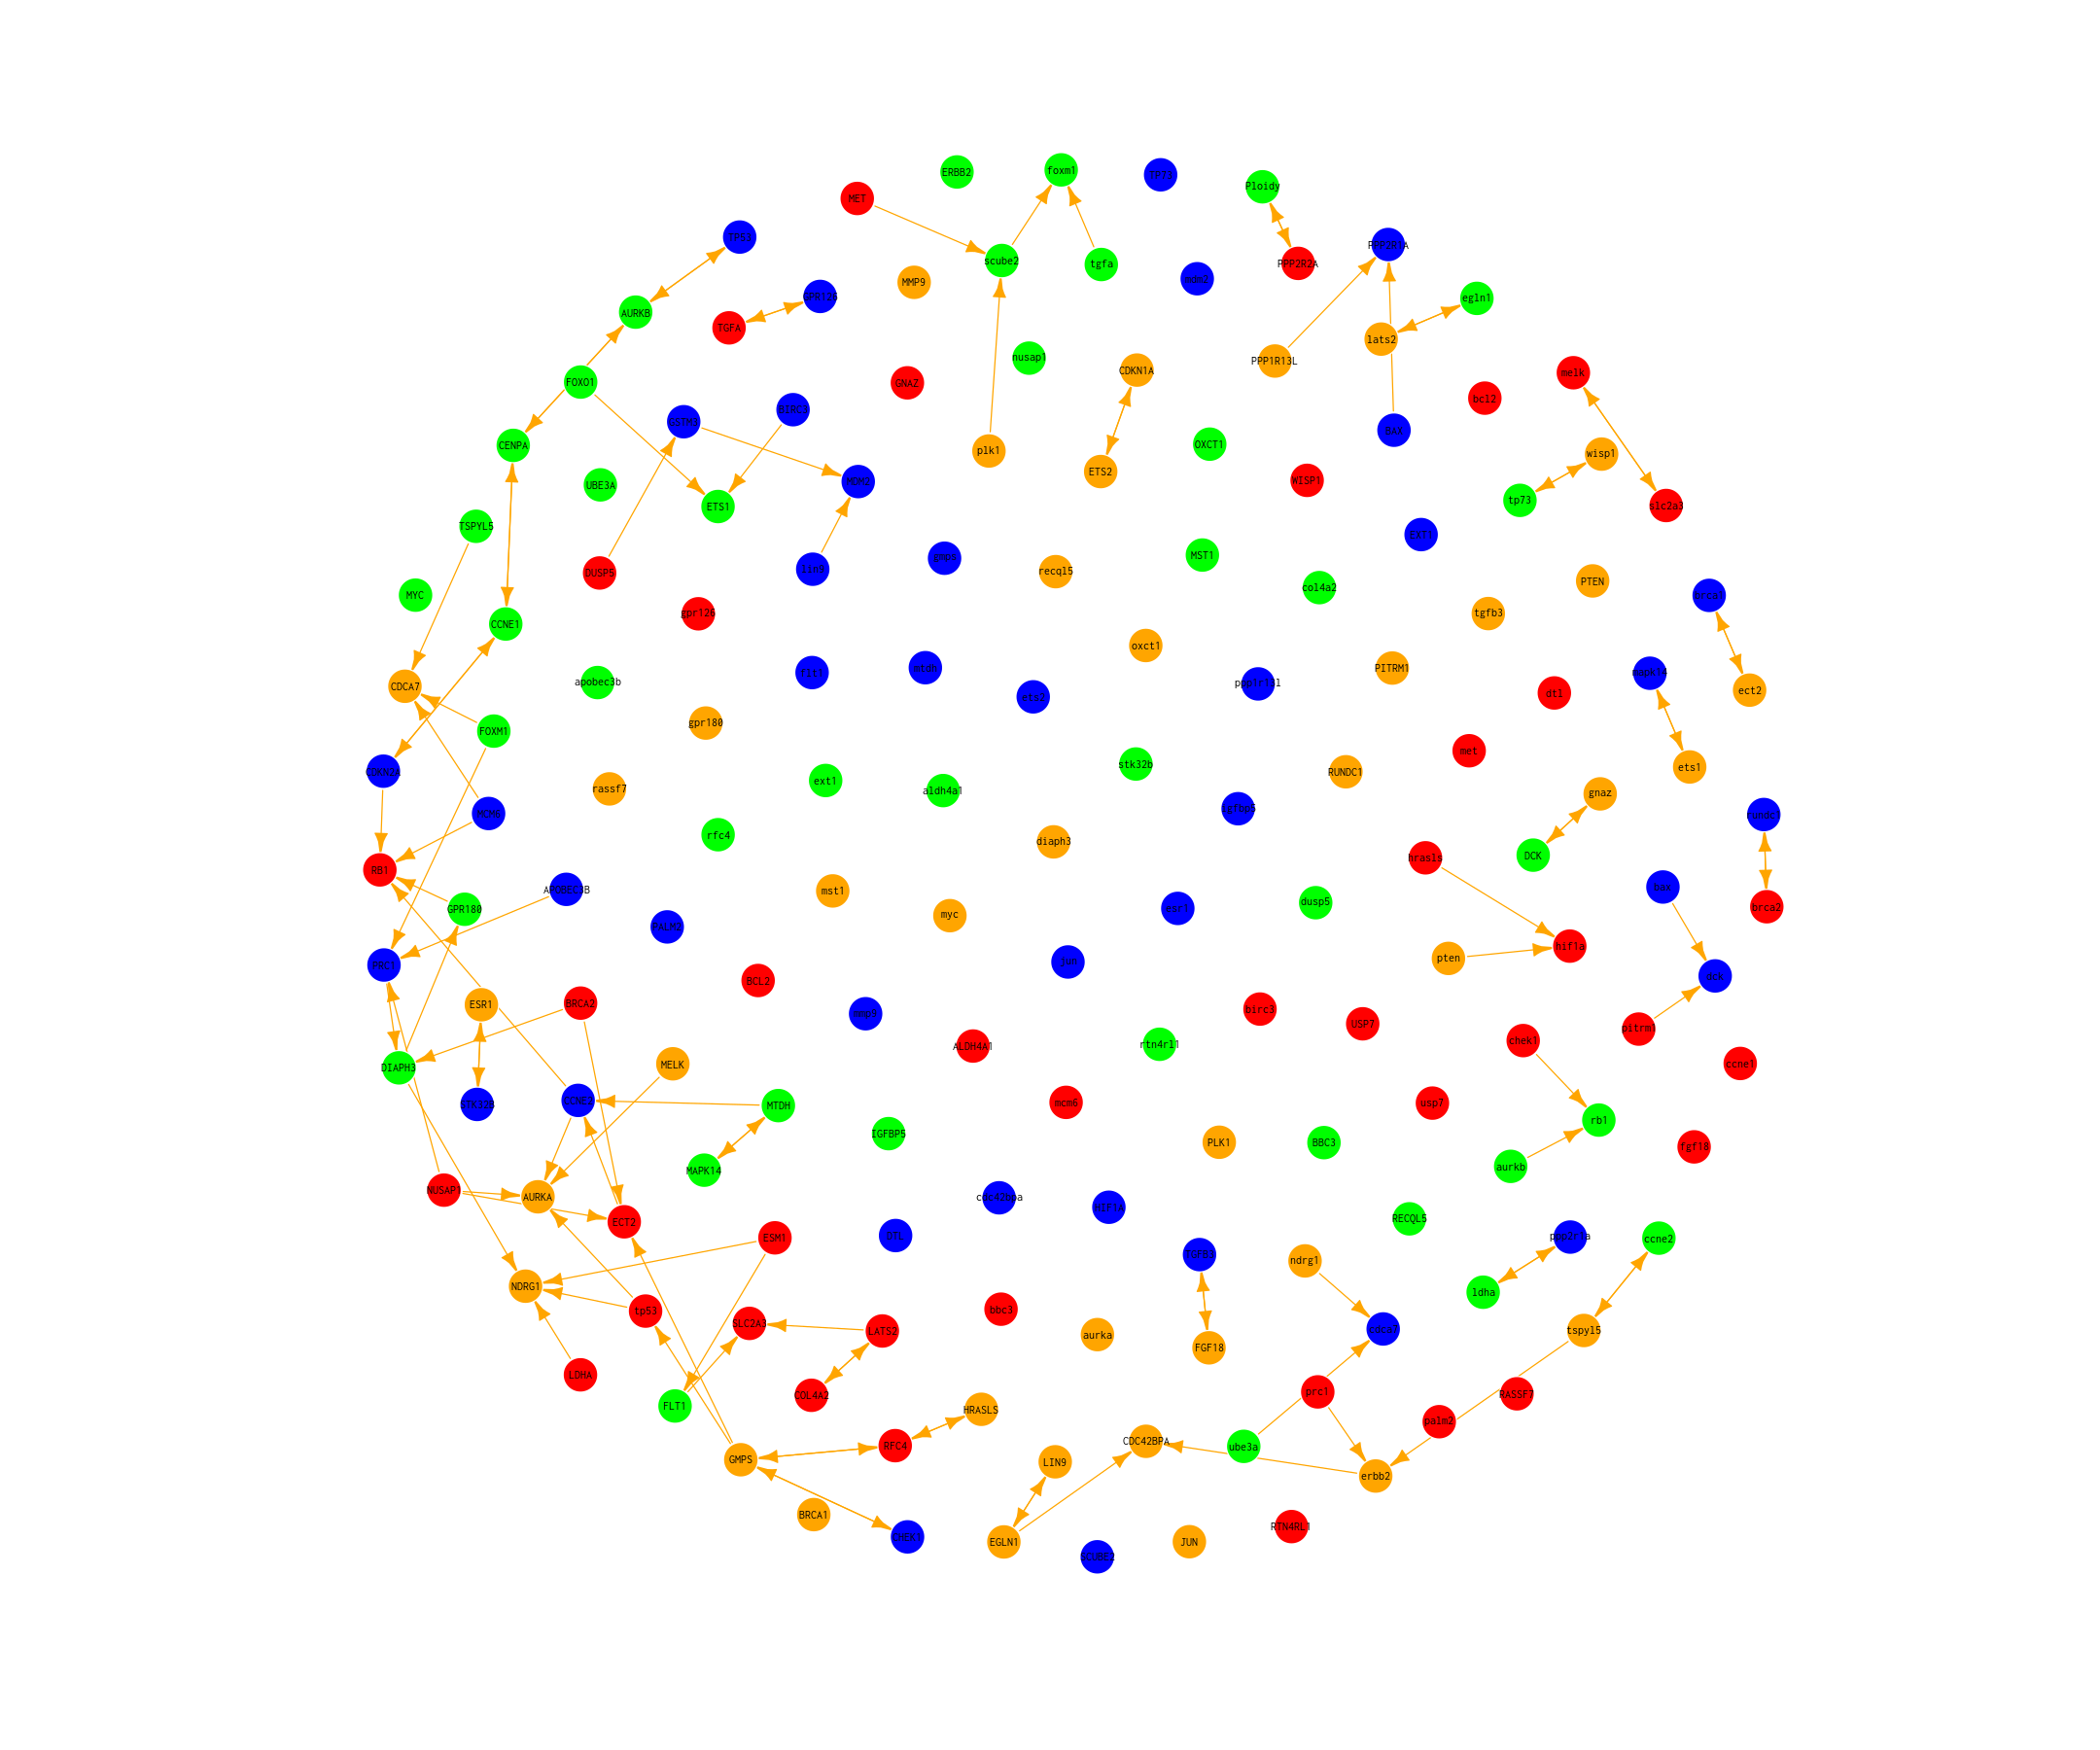

In [11]:
genes_color = c("red", "green","orange", "blue")
pc.cancer_data_bn = bnlearn::as.bn(pc_model, check.cycles = FALSE)
pc.cancer_data_bn_adj = bnlearn::amat(pc.cancer_data_bn)
colnames(pc.cancer_data_bn_adj) = colnames(cosmicCancer_pc)
rownames(pc.cancer_data_bn_adj) = colnames(cosmicCancer_pc)
cancer_pc_net = igraph::graph_from_adjacency_matrix(pc.cancer_data_bn_adj)
e <- igraph::get.edgelist(cancer_pc_net, names = FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=igraph::vcount(cancer_pc_net),
                                       area=20*(igraph::vcount(cancer_pc_net)^2),
                                       repulse.rad=(igraph::vcount(cancer_pc_net)^3.0))
plot(cancer_pc_net, edge.arrow.size = .3,
     edge.color = "orange", vertex.color = genes_color,
     vertex.frame.color ="#FFFFFF",
     vertex.label.color = "black", vertex.label.cex = .6,
     vertex.shape = "circle", vertex.size = 5,
     layout = l)

In [13]:
degree_hc = degree(cancer_pc_net, mode="all")

In [14]:
zero_vertices = as.data.frame(degree_hc[degree_hc==0])

In [15]:
zero_vertices = rownames(zero_vertices)
zero_vertices

[1] "bbc3"     "tgfb3"    "igfbp5"   "fgf18"    "flt1"     "stk32b"  
 [7] "rassf7"   "ext1"     "mtdh"     "mcm6"     "nusap1"   "rfc4"    
[13] "recql5"   "dtl"      "col4a2"   "gpr180"   "mmp9"     "gpr126"  
[19] "rtn4rl1"  "diaph3"   "cdc42bpa" "palm2"    "aldh4a1"  "oxct1"   
[25] "gmps"     "esr1"     "myc"      "jun"      "bcl2"     "aurka"   
[31] "dusp5"    "mst1"     "ppp1r13l" "birc3"    "ets2"     "ccne1"   
[37] "apobec3b" "mdm2"     "usp7"     "met"      "BBC3"     "IGFBP5"  
[43] "SCUBE2"   "WISP1"    "RASSF7"   "EXT1"     "GNAZ"     "PITRM1"  
[49] "RUNDC1"   "RECQL5"   "DTL"      "MMP9"     "RTN4RL1"  "PALM2"   
[55] "ALDH4A1"  "OXCT1"    "ERBB2"    "MYC"      "JUN"      "BCL2"    
[61] "BRCA1"    "TP73"     "MST1"     "HIF1A"    "PTEN"     "USP7"    
[67] "UBE3A"    "PLK1"

In [16]:
cleaned_graph_pc = delete_vertices(graph = cancer_pc_net, v = zero_vertices)

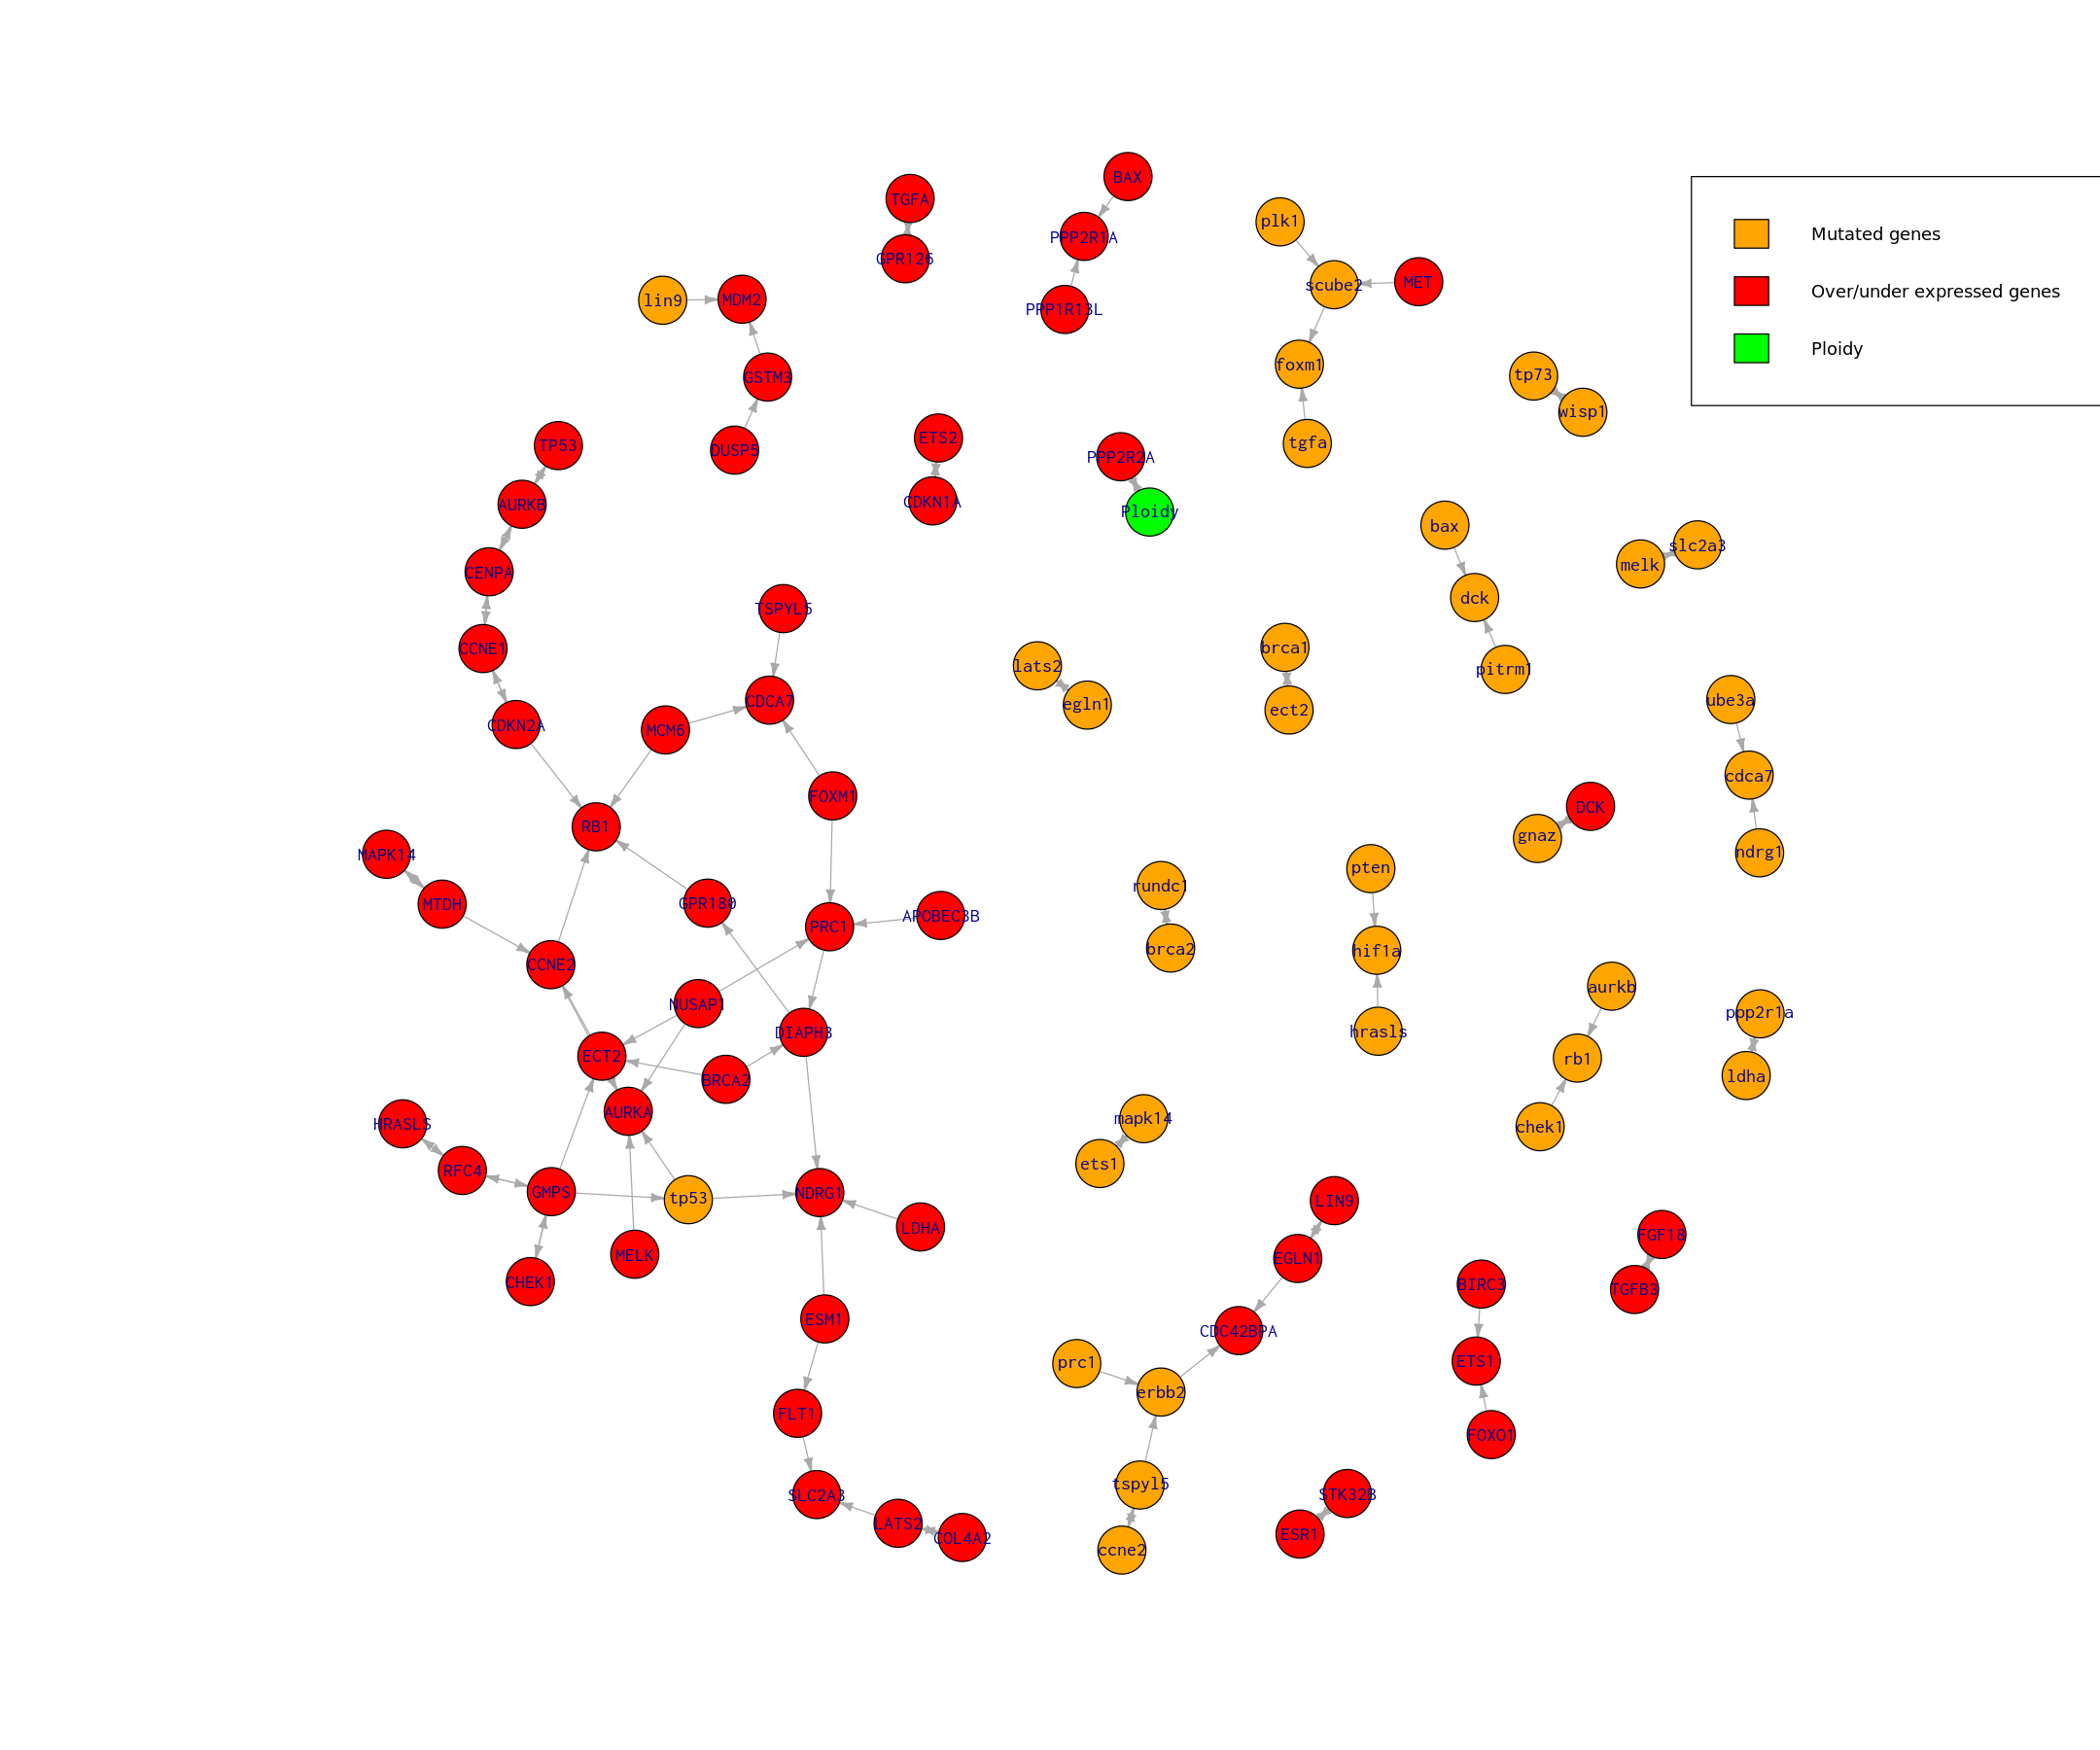

In [17]:
e <- get.edgelist(cleaned_graph_pc,names=FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(cleaned_graph_pc))
plot(cleaned_graph_pc,layout=l,vertex.size=7, edge.arrow.size = .2, vertex.color = ifelse(V(cleaned_graph_pc)$name == toupper(V(cleaned_graph_pc)$name) , "red",ifelse(V(cleaned_graph_pc)$name == "Ploidy", "green", "orange")))
legend(0.9,1,
       legend=c("Mutated genes", "Over/under expressed genes", "Ploidy"),
       fill = c("orange", "red", "green"),       # Color of the squares
       border = "black", # Color of the border of the squares
       cex = 0.9)
# mtext("Removed 0 level vertices", side=1)

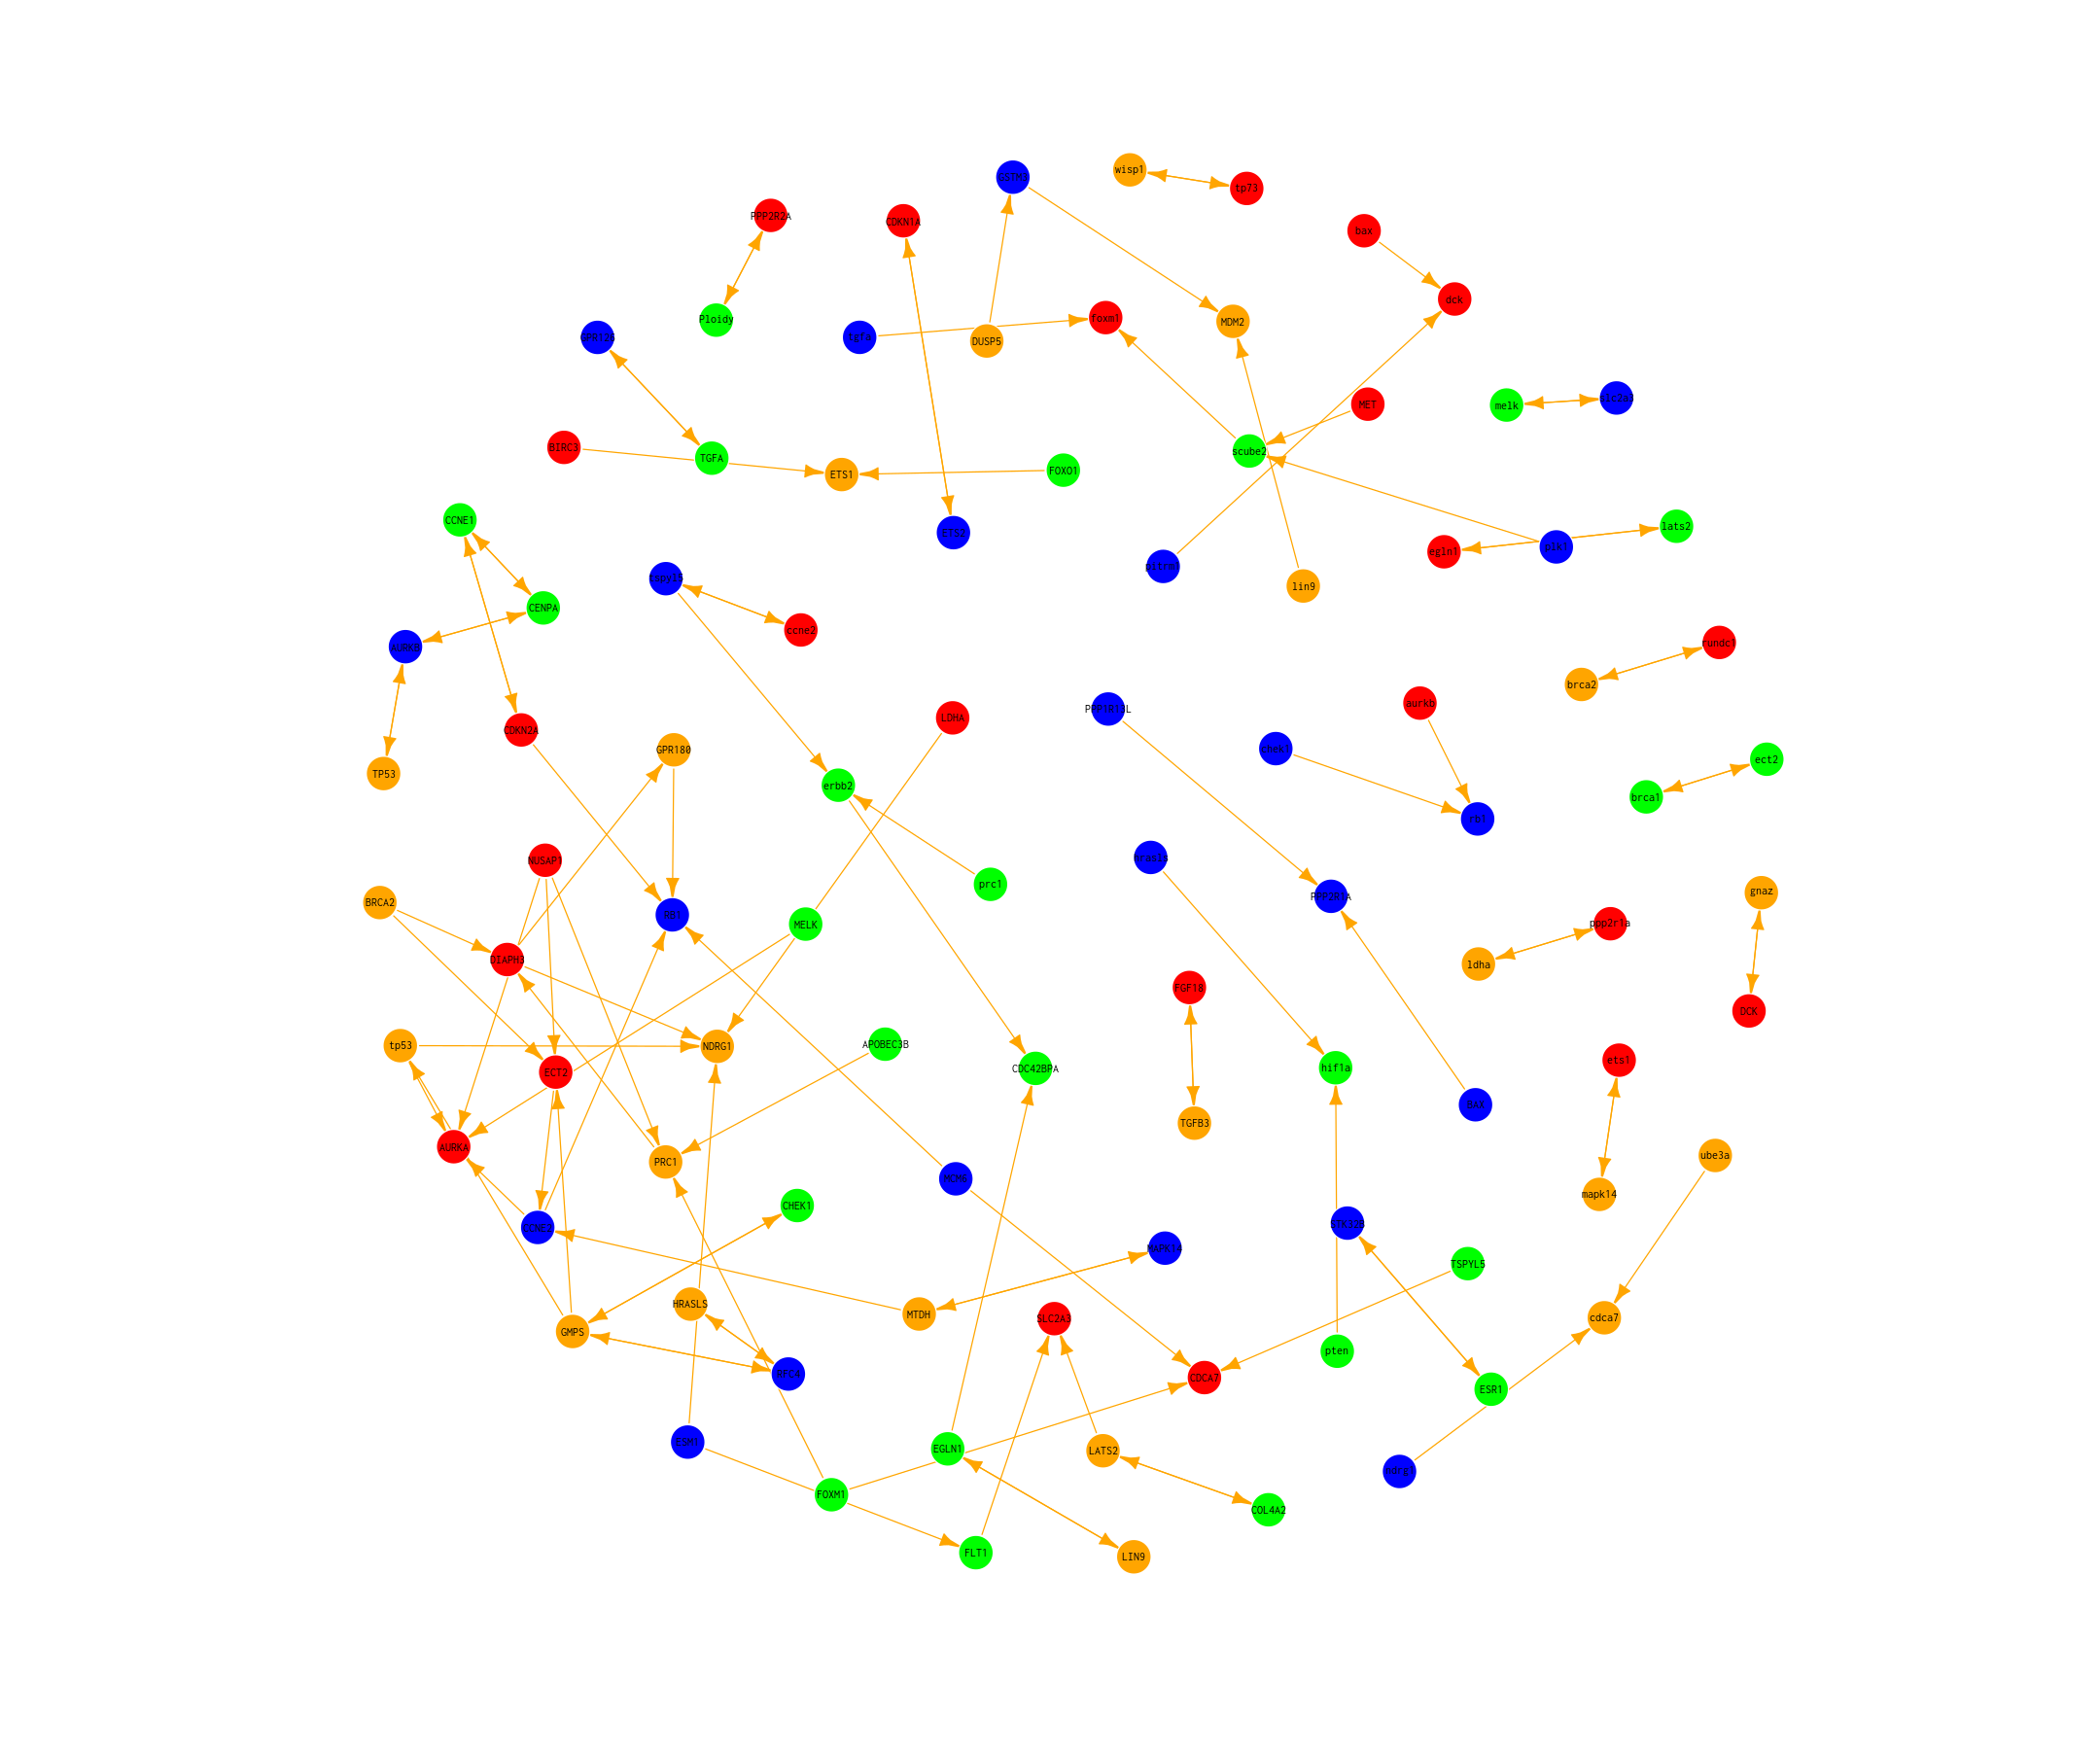

In [18]:
e <- igraph::get.edgelist(cleaned_graph_pc, names = FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=igraph::vcount(cleaned_graph_pc),
                                       area=20*(igraph::vcount(cleaned_graph_pc)^2),
                                       repulse.rad=(igraph::vcount(cleaned_graph_pc)^3.0))
plot(cleaned_graph_pc, edge.arrow.size = .3,
     edge.color = "orange", vertex.color = genes_color,
     vertex.frame.color ="#FFFFFF",
     vertex.label.color = "black", vertex.label.cex = .6,
     vertex.shape = "circle", vertex.size = 5,
     layout = l)

## Identifying relevant nodes and edges

In [20]:
all_vars = colnames(pc.cancer_data_bn_adj)

In [21]:
mutated_genes = all_vars[all_vars == tolower(all_vars)]
mutated_genes

[1] "bbc3"     "egln1"    "tgfb3"    "igfbp5"   "fgf18"    "scube2"  
 [7] "wisp1"    "flt1"     "hrasls"   "stk32b"   "rassf7"   "dck"     
[13] "melk"     "ext1"     "gnaz"     "mtdh"     "pitrm1"   "ccne2"   
[19] "ect2"     "lin9"     "mcm6"     "nusap1"   "tspyl5"   "rundc1"  
[25] "prc1"     "rfc4"     "recql5"   "cdca7"    "dtl"      "col4a2"  
[31] "gpr180"   "mmp9"     "gpr126"   "rtn4rl1"  "diaph3"   "cdc42bpa"
[37] "palm2"    "aldh4a1"  "oxct1"    "gmps"     "slc2a3"   "foxm1"   
[43] "erbb2"    "esr1"     "tp53"     "rb1"      "myc"      "jun"     
[49] "bcl2"     "tp73"     "lats2"    "mapk14"   "chek1"    "aurkb"   
[55] "aurka"    "brca1"    "brca2"    "dusp5"    "mst1"     "ppp1r13l"
[61] "birc3"    "tgfa"     "ets1"     "ets2"     "hif1a"    "ldha"    
[67] "ndrg1"    "ppp2r1a"  "ccne1"    "apobec3b" "pten"     "mdm2"    
[73] "usp7"     "ube3a"    "plk1"     "bax"      "met"

In [22]:
over_under_genes =  all_vars[all_vars == toupper(all_vars)]
over_under_genes

[1] "BBC3"     "EGLN1"    "TGFB3"    "ESM1"     "IGFBP5"   "FGF18"   
 [7] "SCUBE2"   "WISP1"    "FLT1"     "HRASLS"   "STK32B"   "RASSF7"  
[13] "DCK"      "MELK"     "EXT1"     "GNAZ"     "MTDH"     "PITRM1"  
[19] "CCNE2"    "ECT2"     "CENPA"    "LIN9"     "MCM6"     "NUSAP1"  
[25] "TSPYL5"   "RUNDC1"   "PRC1"     "RFC4"     "RECQL5"   "CDCA7"   
[31] "DTL"      "COL4A2"   "GPR180"   "MMP9"     "GPR126"   "RTN4RL1" 
[37] "DIAPH3"   "CDC42BPA" "PALM2"    "ALDH4A1"  "OXCT1"    "GMPS"    
[43] "GSTM3"    "SLC2A3"   "ERBB2"    "ESR1"     "TP53"     "RB1"     
[49] "MYC"      "JUN"      "CDKN2A"   "BCL2"     "FOXM1"    "BRCA1"   
[55] "TP73"     "LATS2"    "MAPK14"   "CDKN1A"   "CHEK1"    "BRCA2"   
[61] "AURKB"    "AURKA"    "APOBEC3B" "DUSP5"    "MST1"     "PPP1R13L"
[67] "BIRC3"    "TGFA"     "ETS1"     "ETS2"     "HIF1A"    "LDHA"    
[73] "FOXO1"    "NDRG1"    "PPP2R1A"  "PPP2R2A"  "CCNE1"    "PTEN"    
[79] "MDM2"     "USP7"     "UBE3A"    "PLK1"     "BAX"      "MET"

### Relation between mutated genes and other ones

In [23]:
mutated_related_others = rowSums(pc.cancer_data_bn_adj[mutated_genes,over_under_genes])
mutated_related_others

bbc3    egln1    tgfb3   igfbp5    fgf18   scube2    wisp1     flt1 
       0        0        0        0        0        0        0        0 
  hrasls   stk32b   rassf7      dck     melk     ext1     gnaz     mtdh 
       0        0        0        0        0        0        1        0 
  pitrm1    ccne2     ect2     lin9     mcm6   nusap1   tspyl5   rundc1 
       0        0        0        1        0        0        0        0 
    prc1     rfc4   recql5    cdca7      dtl   col4a2   gpr180     mmp9 
       0        0        0        0        0        0        0        0 
  gpr126  rtn4rl1   diaph3 cdc42bpa    palm2  aldh4a1    oxct1     gmps 
       0        0        0        0        0        0        0        0 
  slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc      jun 
       0        0        1        0        2        0        0        0 
    bcl2     tp73    lats2   mapk14    chek1    aurkb    aurka    brca1 
       0        0        0        0        0        0        0        0 
   brca2    dusp5     mst1 ppp1r13l    birc3     tgfa     ets1     ets2 
       0        0        0        0        0        0        0        0 
   hif1a     ldha    ndrg1  ppp2r1a    ccne1 apobec3b     pten     mdm2 
       0        0        0        0        0        0        0        0 
    usp7    ube3a     plk1      bax      met 
       0        0        0        0        0

In [24]:
mutated_related_others[mutated_related_others != 0]

gnaz  lin9 erbb2  tp53 
    1     1     1     2

We can confirm on the graph that the significantly related mutated genes are: gnaz, lin9, erbb2, tp53

### Variables Related to Ploidy

In [25]:
ploidy_related = pc.cancer_data_bn_adj[, "Ploidy"]

In [26]:
ploidy_related[ploidy_related != 0]

PPP2R2A 
      1

There is one variables related to Ploidy called PPP2R2A

### Top 10 nodes and edges

#### Top Nodes

In [27]:
topNodes = as.data.frame(betweenness(
  cleaned_graph_pc,
  v = V(cleaned_graph_pc),
  directed = TRUE,
  weights = NULL
))
colnames(topNodes) <- c('BW')
topNodes$name <- rownames(topNodes)

In [28]:
topNodes[order(topNodes$BW, decreasing = T),][0:10,]

,BW,name
,<dbl>,<chr>
GMPS,22.0,GMPS
DIAPH3,13.5,DIAPH3
CCNE2,12.5,CCNE2
ECT2,12.5,ECT2
PRC1,11.0,PRC1
CENPA,10.0,CENPA
RFC4,10.0,RFC4
CCNE1,9.0,CCNE1
tp53,8.0,tp53


#### Top Edges

In [29]:
topEdges = as.data.frame(edge_betweenness(
  cleaned_graph_pc,
  e = E(cleaned_graph_pc),
  directed = TRUE,
  weights = NULL
))
colnames(topEdges) <- c('BW')
topEdges$name <- rownames(topEdges)

In [30]:
top10Edges = topEdges[order(topEdges$BW, decreasing = T),][0:10,]
top10Edges

,BW,name
,<dbl>,<chr>
62,16.0,62
50,15.5,50
60,15.0,60
68,12.0,68
69,12.0,69
66,10.5,66
48,9.5,48
42,9.0,42
52,9.0,52


In [31]:
top10Edges$name

[1] "62" "50" "60" "68" "69" "66" "48" "42" "52" "83"

In [32]:
for (name in top10Edges$name){
    print(E(cleaned_graph_pc)[strtoi(name)])
}

+ 1/101 edge from 5fabff8 (vertex names):
[1] RFC4->GMPS
+ 1/101 edge from 5fabff8 (vertex names):
[1] ECT2->CCNE2
+ 1/101 edge from 5fabff8 (vertex names):
[1] PRC1->DIAPH3
+ 1/101 edge from 5fabff8 (vertex names):
[1] GMPS->tp53
+ 1/101 edge from 5fabff8 (vertex names):
[1] GMPS->ECT2
+ 1/101 edge from 5fabff8 (vertex names):
[1] DIAPH3->GPR180
+ 1/101 edge from 5fabff8 (vertex names):
[1] CCNE2->RB1
+ 1/101 edge from 5fabff8 (vertex names):
[1] HRASLS->RFC4
+ 1/101 edge from 5fabff8 (vertex names):
[1] CENPA->CCNE1
+ 1/101 edge from 5fabff8 (vertex names):
[1] CHEK1->GMPS
